### Importing libraries

In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2 as cv
from astropy.visualization import make_lupton_rgb

### Add path to fits files

In [3]:
image_list = ["ngc2835/hlsp_phangs-hst_hst_wfc3-uvis_ngc2835_f275w_v1_exp-drc-sci.fits",
              "ngc2835/hlsp_phangs-hst_hst_wfc3-uvis_ngc2835_f336w_v1_exp-drc-sci.fits",
              "ngc2835/hlsp_phangs-hst_hst_wfc3-uvis_ngc2835_f438w_v1_exp-drc-sci.fits",
              "ngc2835/hlsp_phangs-hst_hst_wfc3-uvis_ngc2835_f555w_v1_exp-drc-sci.fits",
              "ngc2835/hlsp_phangs-hst_hst_wfc3-uvis_ngc2835_f814w_v1_exp-drc-sci.fits"]

### Import data into an array

In [4]:
images = [fits.getdata(image) for image in image_list]
norm_images = [img[1000:7000, 1000:7000] / np.percentile(img[1000:7000, 1000:7000], 98) for img in images]



### Combining fits files into 3 channel image

In [10]:
#USING WEIGHTED MEAN SCHEME
R = norm_images[4] *0.3 + norm_images[3] * 0.7
G = norm_images[2]* 0.7 + norm_images[3]* 0.3 
B = norm_images[0]* 0.5 + norm_images[1] * 0.5

rgb_image = np.stack([R, G, B], axis=-1)

rgb_image = gaussian_filter(rgb_image, sigma=0.98)

rgb_image = np.clip(rgb_image, 0, 1)

rgb_image_8bit = (rgb_image * 255).astype(np.uint8)

: 

Previewing the image with matplotlib

TypeError: Invalid shape (6000, 3, 6000) for image data

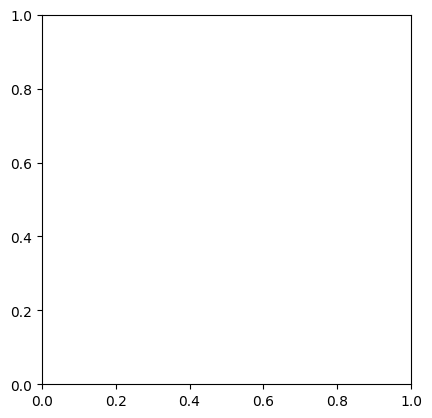

In [9]:
#PREVIEW WITH MATPLOTLIB
plt.imshow(rgb_image, origin='lower')
plt.axis('off')

Writing to image file with openCV

In [7]:
cv.imwrite('stacked_image.png', rgb_image_8bit)

True

### Using Lupton stacking scheme

In [9]:
#USING LUPTON SCHEME
rgb_image = make_lupton_rgb(R, G, B, stretch=1, Q=1)

(np.float64(-0.5), np.float64(5999.5), np.float64(-0.5), np.float64(5999.5))

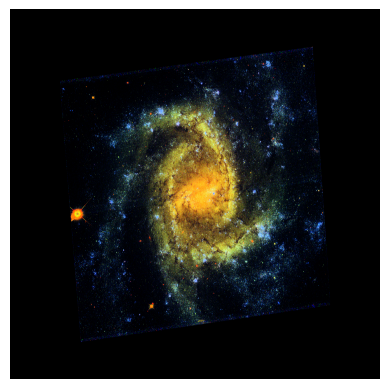

In [10]:
#PREVIEW WITH MATPLOTLIB
plt.imshow(rgb_image, origin='lower')
plt.axis('off')

In [11]:
#writing with opencv
p0, p100 = np.percentile(rgb_image, (0, 100))
rgb_image = np.clip((rgb_image - p0) / (p100 - p0), 0, 1)
rgb_image = np.flipud(rgb_image)
rgb_image_8bit = (rgb_image*255).astype(np.uint8)
rgb_image_bgr = cv.cvtColor(rgb_image_8bit, cv.COLOR_RGB2BGR)
cv.imwrite('fullstack_lupton.png', rgb_image_bgr)

True